# CIS 4526 Sp23 HomeWork 4

### classifying weather by taking pictures

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
# run the following if it is the first time
try:
    import cv2
except:
    os.system("pip install opencv-python")

In [3]:
import cv2

### The purpose of this homework is to give you a chance to practice what you have learned in using Convolution Neural Network 

***Make sure you have download the weather_data.zip file from Canvas and save it under a subfolder name data/weather_data***

In [4]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


weather_data = '/kaggle/input/weather-data/weather_data'

In [5]:
cloud_set = [
    '{}/{}'.format(weather_data,i) 
    for i in os.listdir(weather_data) 
    if 'cloudy' in i
]
rain_set = [
    '{}/{}'.format(weather_data,i) 
    for i in os.listdir(weather_data) 
    if 'rain' in i
]
sunrise_set = [
    '{}/{}'.format(weather_data,i) 
    for i in os.listdir(weather_data) 
    if 'sunrise' in i
]
sunshine_set = [
    '{}/{}'.format(weather_data,i) 
    for i in os.listdir(weather_data) 
    if 'shine' in i
]

In [6]:
cloud_set

['/kaggle/input/weather-data/weather_data/cloudy88.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy167.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy78.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy80.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy2.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy89.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy99.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy256.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy9.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy185.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy208.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy44.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy269.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy102.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy20.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy30.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy71.jpg',
 '/kaggle/input/weather-dat

In [7]:
# Randomly Shuffle the order of the images files
random.shuffle(cloud_set)
random.shuffle(rain_set)
random.shuffle(sunrise_set)
random.shuffle(sunshine_set)

In [8]:
cloud_set

['/kaggle/input/weather-data/weather_data/cloudy201.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy131.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy41.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy218.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy186.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy153.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy29.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy121.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy76.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy267.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy180.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy125.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy281.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy130.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy271.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy115.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy294.jpg',
 '/kaggle/input/w

In [9]:
# Now randomly split the image files into a training set and a testing set
train_set = cloud_set[:150] + rain_set[:150] + sunrise_set[:150] + sunshine_set[:150]
test_set = cloud_set[150:] + rain_set[150:] + sunrise_set[:150] + sunshine_set[:150]

In [10]:
train_set

['/kaggle/input/weather-data/weather_data/cloudy201.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy131.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy41.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy218.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy186.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy153.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy29.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy121.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy76.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy267.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy180.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy125.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy281.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy130.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy271.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy115.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy294.jpg',
 '/kaggle/input/w

In [11]:
# define a few parameters
n_rows = 150
n_cols = 150
channels = 3 # RBG

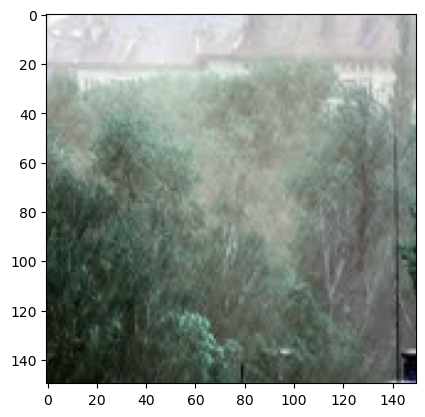

In [12]:
# Display some images
idx = 200
#image = train_set[idx]
image = f"{weather_data}/rain140.jpg"
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

In [13]:
# Create the X_train, X_test, y_train, y_test
X_train = []
X_test = []
y_train = []
y_test = []

# 7.) Read and Label Each Image in the Training Set
for image in train_set:
    try:
        X_train.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_train.append(1)
        elif 'rain' in image:
            y_train.append(2)
        elif 'sunrise' in image:
            y_train.append(3)
        elif 'shine' in image:
            y_train.append(4)
    except Exception:
        print('Failed to format: ', image)

# 8.) Read and Label Each Image in the Testing Set
for image in test_set:
    try:
        X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_test.append(1)
        elif 'rain' in image:
            y_test.append(2)
        elif 'sunrise' in image:
            y_test.append(3)
        elif 'shine' in image:
            y_test.append(4)
    except Exception:
        print('Failed to format: ', image)

<AxesSubplot:xlabel='y_train', ylabel='count'>

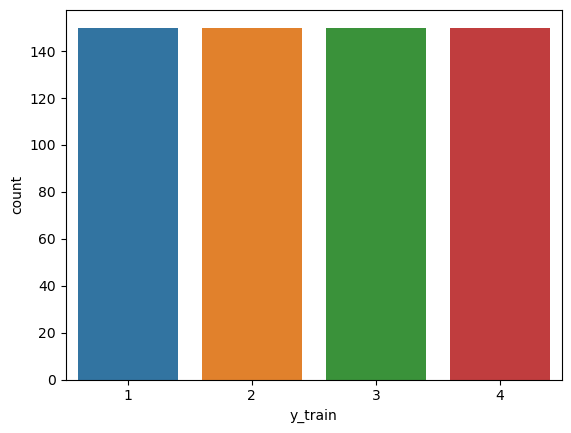

In [14]:
# sns.countplot(y_train)
sns.countplot(x='y_train',data=pd.DataFrame({'y_train':y_train}))

In [15]:
# Convert to Numpy Arrays and Switch Targets to Categorical
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

[0. 1. 0. 0. 0.]


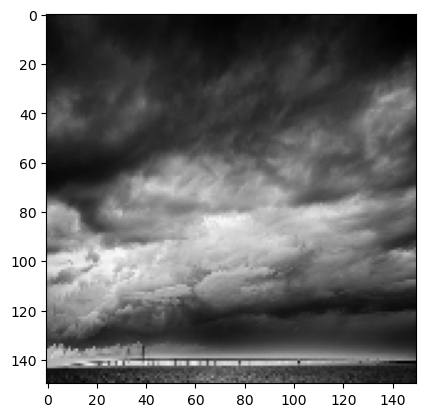

In [16]:
# display some X_test, y_test
idx = 1
#idx = 435
print(y_test[idx])
plt.imshow(X_test[idx])

### Now finally we have the data setup and we can build some classification model using CNN

### Make sure your work include the following steps

* Define, Compile and Run one CNN model
* Plot the learning curve
* Try a few different different network structure by varying the number of hidden nodes and with and without Dropout
* Try two different Dropout percentage
* Comment on your result, in particular if the Dropout helps or not

***Type your code here***

In [17]:
X_test[idx].shape

(150, 150, 3)

In [18]:
# Define your model here

# ...
# 13.) Model Summary
# define a small convent

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers

inputs = layers.Input(shape=(150, 150, 3))
# for color images, may need to scale and normalize the inputs
# x = layers.Rescaling(1./255)(inputs)
# x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Dropout(.5)(x)
x = Flatten()(x)
outputs = Dense(units=5, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)
print(model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856 

### Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

In [19]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((600, 150, 150, 3), (600, 5), (514, 150, 150, 3), (514, 5))

# 14.) Compile and Train the Model
* model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
* history = model.fit(X_train, y_train, validation_data=(X_test, y_test), ....)

In [20]:
from tensorflow.keras import metrics

dir(metrics)

['AUC',
 'Accuracy',
 'BinaryAccuracy',
 'BinaryCrossentropy',
 'BinaryIoU',
 'CategoricalAccuracy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'FalseNegatives',
 'FalsePositives',
 'Hinge',
 'IoU',
 'KLD',
 'KLDivergence',
 'LogCoshError',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'Mean',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanIoU',
 'MeanMetricWrapper',
 'MeanRelativeError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'MeanTensor',
 'Metric',
 'OneHotIoU',
 'OneHotMeanIoU',
 'Poisson',
 'Precision',
 'PrecisionAtRecall',
 'Recall',
 'RecallAtPrecision',
 'RootMeanSquaredError',
 'SensitivityAtSpecificity',
 'SparseCategoricalAccuracy',
 'SparseCategoricalCrossentropy',
 'SparseTopKCategoricalAccuracy',
 'SpecificityAtSensitivity',
 'SquaredHinge',
 'Sum',
 'TopKCategoricalAccuracy',
 'TrueNegatives',
 'TruePositives',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

filepath = '/kaggle/working/with_dropout.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

metrics = ['Recall','Precision','accuracy']
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics,)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100


2023-04-29 20:20:47.992362: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


8/8 [==============================] - ETA: 0s - loss: 280.2932 - recall: 0.3542 - precision: 0.3549 - accuracy: 0.3542
Epoch 1: accuracy improved from inf to 0.35417, saving model to /kaggle/working/with_dropout.hdf5
8/8 [==============================] - 9s 148ms/step - loss: 280.2932 - recall: 0.3542 - precision: 0.3549 - accuracy: 0.3542 - val_loss: 20.7597 - val_recall: 0.0083 - val_precision: 0.0083 - val_accuracy: 0.0083
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 3.8964 - recall: 0.5826 - precision: 0.5973 - accuracy: 0.5893
Epoch 2: accuracy did not improve from 0.35417
8/8 [==============================] - 0s 38ms/step - loss: 3.7080 - recall: 0.5750 - precision: 0.6026 - accuracy: 0.5875 - val_loss: 1.8632 - val_recall: 0.4250 - val_precision: 0.5204 - val_accuracy: 0.4917
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 0.8459 - recall: 0.6250 - precision: 0.8187 - accuracy: 0.7210
Epoch 3: accuracy did not improve from 0.35417
8/8 

### Plot learning Curves

***Type your code here***

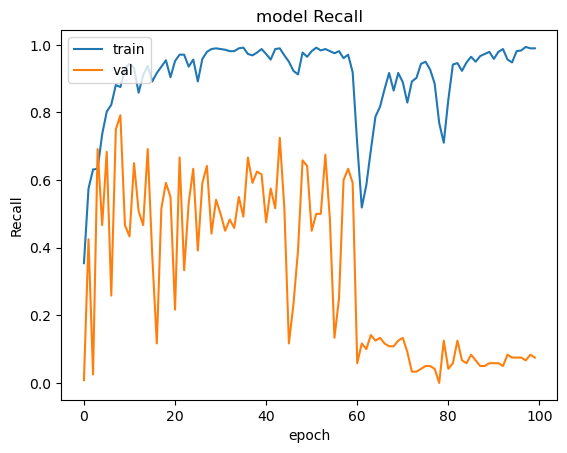

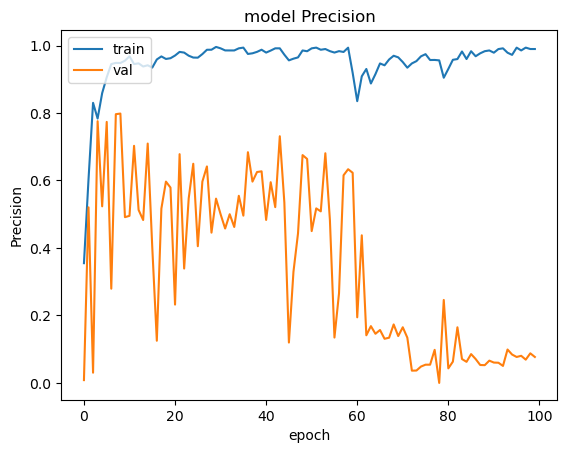

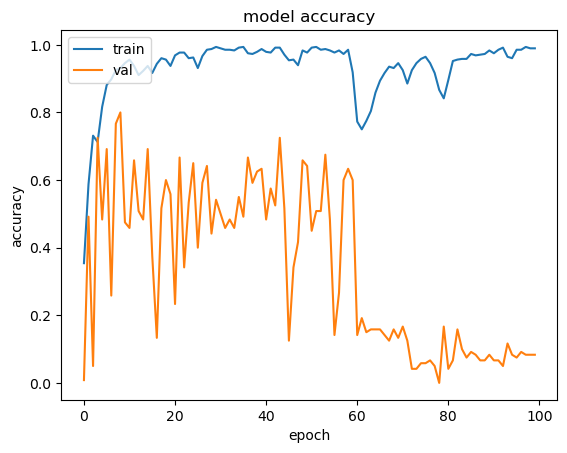

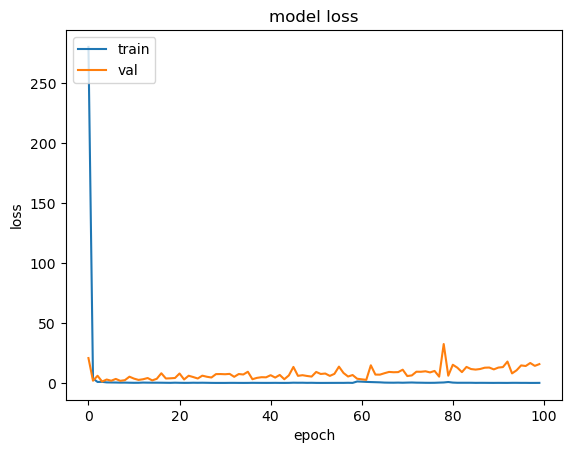

In [22]:
# Plot Accuracy Over Training Period
import matplotlib.pyplot as plt

for metric in metrics+['loss']:
    plt.plot(history.history[metric.lower()])
    plt.plot(history.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

### Evaluating the model out-of-sample

In [23]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")


17/17 [==============================] - 0s 8ms/step - loss: 11.5637 - recall: 0.4027 - precision: 0.4027 - accuracy: 0.4027
Test accuracy: 0.403
Test recall: 0.403
Test precision: 0.403


### Model 1 with No dropout
dropout 0.2, sgd optimizer with Rescaling and Batchnorm

In [24]:
# for color images, may need to scale and normalize the inputs
inputs = layers.Input(shape=(150, 150, 3))
# x = layers.Rescaling(1./255)(inputs)
# x = layers.BatchNormalization()(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
# x = layers.Dropout(.5)(x)
x = Flatten()(x)
outputs = Dense(units=5, activation="softmax")(x)
model1 = Model(inputs=inputs, outputs=outputs)
print(model1.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 32)        1846

In [25]:
filepath = '/kaggle/working/without_dropout.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model1.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics)

history1 = model1.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 46.0361 - recall: 0.3458 - precision: 0.3458 - accuracy: 0.3458
Epoch 1: accuracy improved from inf to 0.34583, saving model to /kaggle/working/without_dropout.hdf5
8/8 [==============================] - 4s 222ms/step - loss: 46.0361 - recall: 0.3458 - precision: 0.3458 - accuracy: 0.3458 - val_loss: 27.6191 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 5.0568 - recall: 0.3906 - precision: 0.5240 - accuracy: 0.4442
Epoch 2: accuracy did not improve from 0.34583
8/8 [==============================] - 0s 50ms/step - loss: 4.7961 - recall: 0.3812 - precision: 0.5351 - accuracy: 0.4479 - val_loss: 1.9553 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_accuracy: 0.1167
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 1.1445 - recall: 0.2812 - precision: 0.9333 - accuracy: 0.5513
Epoch 3: accuracy 

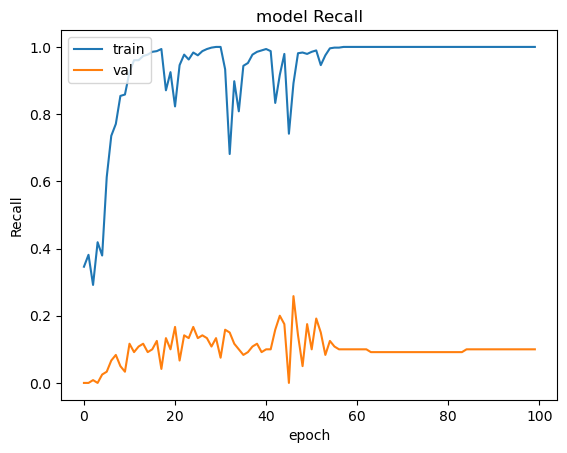

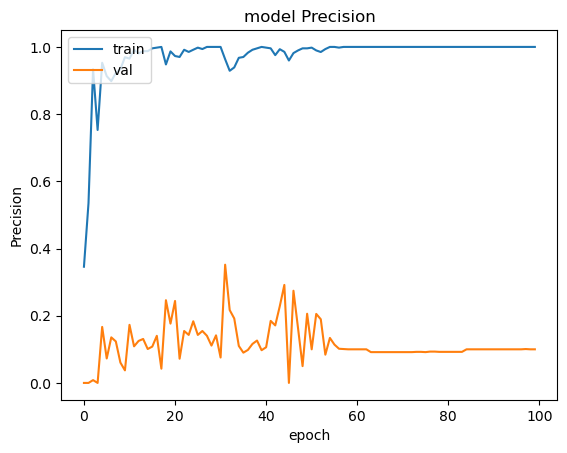

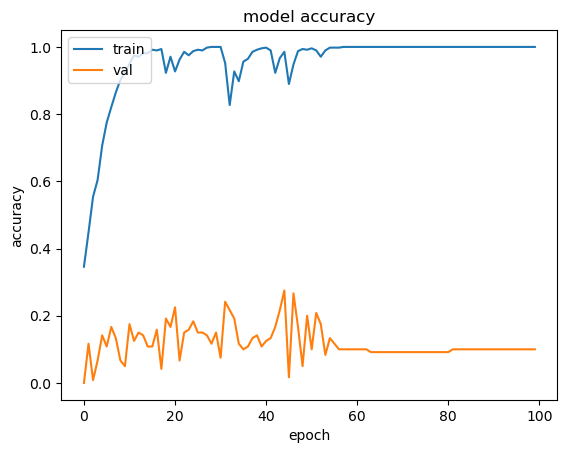

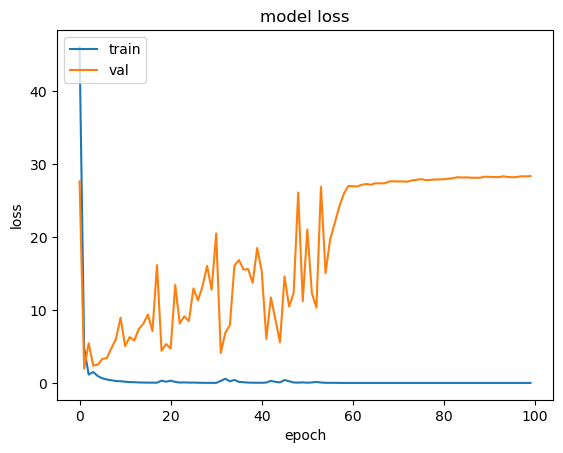

In [26]:
for metric in metrics+['loss']:
    plt.plot(history1.history[metric.lower()])
    plt.plot(history1.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [27]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 0s 15ms/step - loss: 19.9594 - recall: 0.2938 - precision: 0.2943 - accuracy: 0.2938
Test accuracy: 0.294
Test recall: 0.294
Test precision: 0.294


### Try transfer learning with pretrained VGG with dropout 0.5

In [28]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152, Xception,VGG19,EfficientNetB4

input_shape = (150,150,3)
num_classes = 5
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in vgg_model.layers:
    layer.trainable = False
    
x = layers.Dropout(.5)(vgg_model.output)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model_vgg = Model(inputs=vgg_model.input, outputs=x)
model_vgg.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                            

In [29]:
filepath = '/kaggle/working/vgg_dropout.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model_vgg.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics)

history_vgg = model_vgg.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100


2023-04-29 20:22:57.572237: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


8/8 [==============================] - ETA: 0s - loss: 8.8855 - recall: 0.6917 - precision: 0.6931 - accuracy: 0.6938
Epoch 1: accuracy improved from inf to 0.69375, saving model to /kaggle/working/vgg_dropout.hdf5
8/8 [==============================] - 9s 731ms/step - loss: 8.8855 - recall: 0.6917 - precision: 0.6931 - accuracy: 0.6938 - val_loss: 3.5370 - val_recall: 0.7417 - val_precision: 0.7417 - val_accuracy: 0.7417
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 1.5461 - recall: 0.9129 - precision: 0.9129 - accuracy: 0.9129
Epoch 2: accuracy did not improve from 0.69375
8/8 [==============================] - 1s 106ms/step - loss: 1.5488 - recall: 0.9104 - precision: 0.9104 - accuracy: 0.9104 - val_loss: 10.7994 - val_recall: 0.4417 - val_precision: 0.4454 - val_accuracy: 0.4417
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 0.5643 - recall: 0.9621 - precision: 0.9621 - accuracy: 0.9621
Epoch 3: accuracy did not improve from 0.69375
8/8 [===

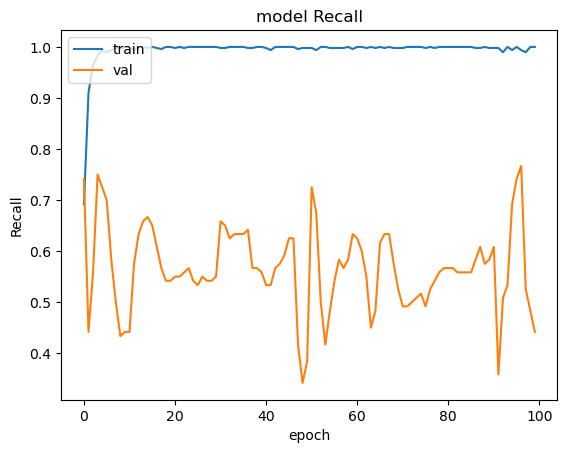

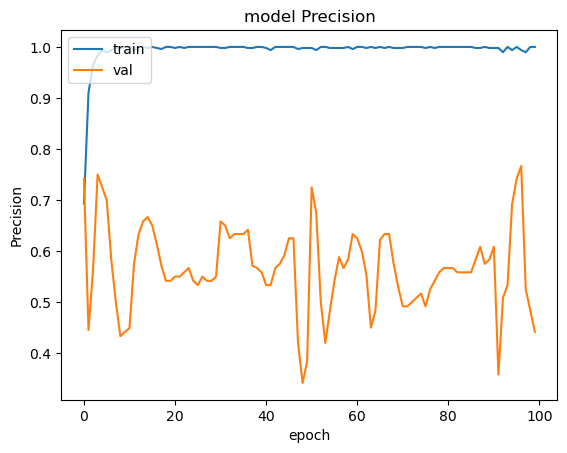

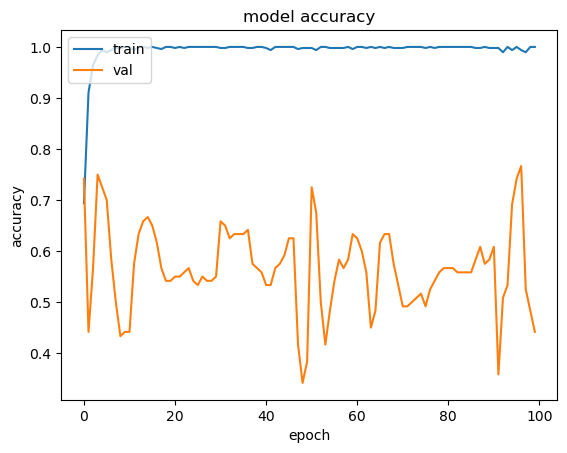

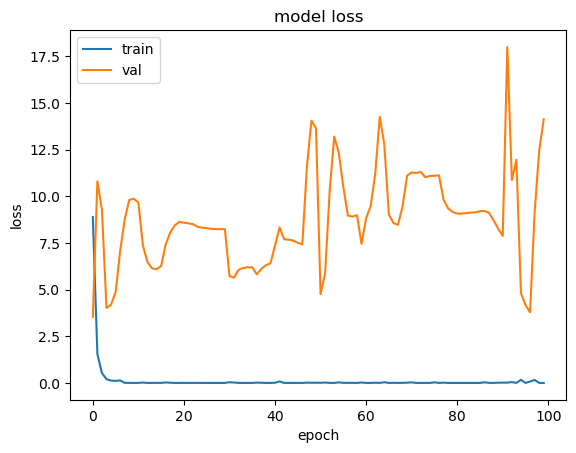

In [30]:
for metric in metrics+['loss']:
    plt.plot(history_vgg.history[metric.lower()])
    plt.plot(history_vgg.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [31]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 1s 53ms/step - loss: 2.4586 - recall: 0.8230 - precision: 0.8230 - accuracy: 0.8230
Test accuracy: 0.823
Test recall: 0.823
Test precision: 0.823


### VGG without dropout

In [32]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152, Xception,VGG19,EfficientNetB4

input_shape = (150,150,3)
num_classes = 5
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in vgg_model.layers:
    layer.trainable = False
    
x = Flatten()(vgg_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model_vgg = Model(inputs=vgg_model.input, outputs=x)
model_vgg.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [33]:
filepath = '/kaggle/working/vgg_without_dropout.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model_vgg.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics)

history_vgg = model_vgg.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100
7/8 [=========================>....] - ETA: 0s - loss: 3.3744 - recall: 0.7500 - precision: 0.7534 - accuracy: 0.7500
Epoch 1: accuracy improved from inf to 0.76250, saving model to /kaggle/working/vgg_without_dropout.hdf5
8/8 [==============================] - 3s 173ms/step - loss: 3.1870 - recall: 0.7625 - precision: 0.7657 - accuracy: 0.7625 - val_loss: 3.0535 - val_recall: 0.8083 - val_precision: 0.8083 - val_accuracy: 0.8083
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 0.4288 - recall: 0.9799 - precision: 0.9799 - accuracy: 0.9799
Epoch 2: accuracy did not improve from 0.76250
8/8 [==============================] - 1s 96ms/step - loss: 0.4323 - recall: 0.9771 - precision: 0.9771 - accuracy: 0.9771 - val_loss: 12.6511 - val_recall: 0.4500 - val_precision: 0.4500 - val_accuracy: 0.4500
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 0.2647 - recall: 0.9821 - precision: 0.9821 - accuracy: 0.9821
Epoch 3: accuracy did not improve fr

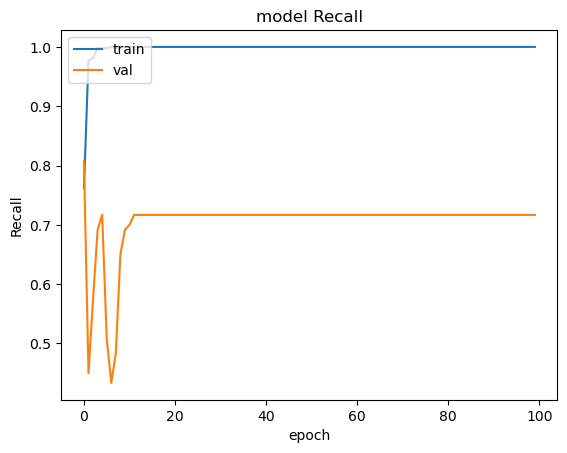

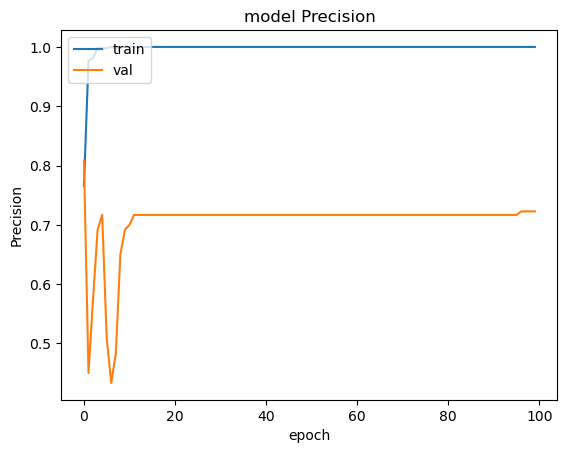

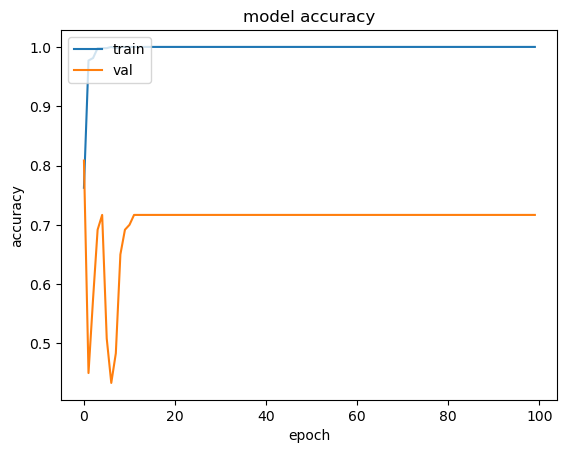

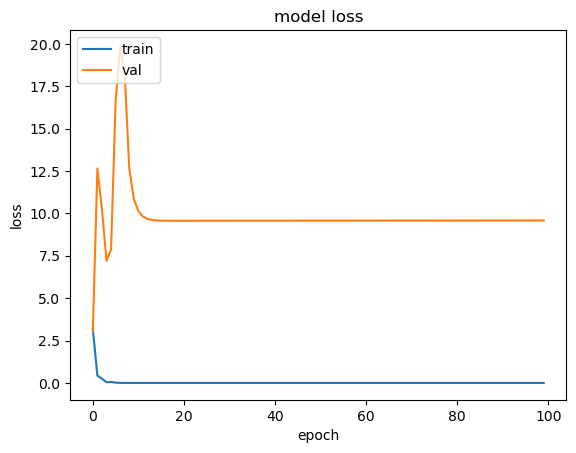

In [34]:
for metric in metrics+['loss']:
    plt.plot(history_vgg.history[metric.lower()])
    plt.plot(history_vgg.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [35]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 1s 39ms/step - loss: 1.2441 - recall: 0.9222 - precision: 0.9222 - accuracy: 0.9222
Test accuracy: 0.922
Test recall: 0.922
Test precision: 0.922


### Comment on your results